In [2]:
%reset -f
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [3]:
## import data and randomize data
spine_data = pd.read_csv('datasets/spine_data.csv',
                         skiprows=1,
                         names= ['pelvic_confidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                 'sacral_slope',
                                 'pelvic_radius',
                                 'degree_spondylolisthesis',
                                 'pelvice_slope',
                                 'direct_tilt',
                                 'thoracic_slope',
                                 'cervical_tilt',
                                 'sacrum_angle',
                                 'scoliosis_slope',
                                 'class'])

In [5]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)
spine_data.head()

,pelvic_confidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvice_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,70.484104,12.489488,62.417142,57.994617,114.190049,56.902448,0.823630,13.5572,10.4727,11.19482,-1.999994,26.1908,Abnormal
1,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0.581169,12.0774,16.6255,7.20496,-31.374823,29.5748,Normal
2,34.756738,2.631740,29.504381,32.124998,127.139850,-0.460894,0.281612,24.1257,11.2762,11.54866,-12.025220,44.3412,Normal
3,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180,Abnormal
4,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,0.979253,25.3481,8.2316,12.17025,1.594477,31.4138,Abnormal


In [6]:
print(spine_data.shape)
spine_data[spine_data.isnull().any(axis=1)].count()

(310, 13)


pelvic_confidence           0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvice_slope               0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [7]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_confidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvice_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [8]:
spine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_confidence         310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvice_slope             310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [10]:
## the class column is a string datatype, but is essentially true/false so we will labelencode this to make it numeric
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
s_spine_data_class = spine_data['class'].astype(str)
spine_data['class'] = label_encoding.fit_transform(s_spine_data_class)
spine_data.sample(5)

,pelvic_confidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvice_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
286,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,0.052602,31.0079,14.4887,14.17105,-31.121553,32.2469,0
106,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,0.056944,31.8230,15.7134,9.36778,-33.489059,28.9479,0
130,69.398818,18.898407,75.966361,50.500411,103.582540,-0.443661,0.647609,29.0187,13.1408,9.58711,-22.403652,12.5917,1
67,70.952728,20.159931,62.859109,50.792797,116.177932,32.522331,0.054843,7.3173,16.3676,12.21365,-5.091336,17.2601,0
183,50.825029,9.064729,56.300000,41.760300,78.999454,23.041524,0.051930,29.3962,16.3725,11.35215,-26.496342,33.9151,0


In [11]:
spine_data_corr = spine_data.corr()
spine_data_corr

,pelvic_confidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvice_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_confidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvice_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


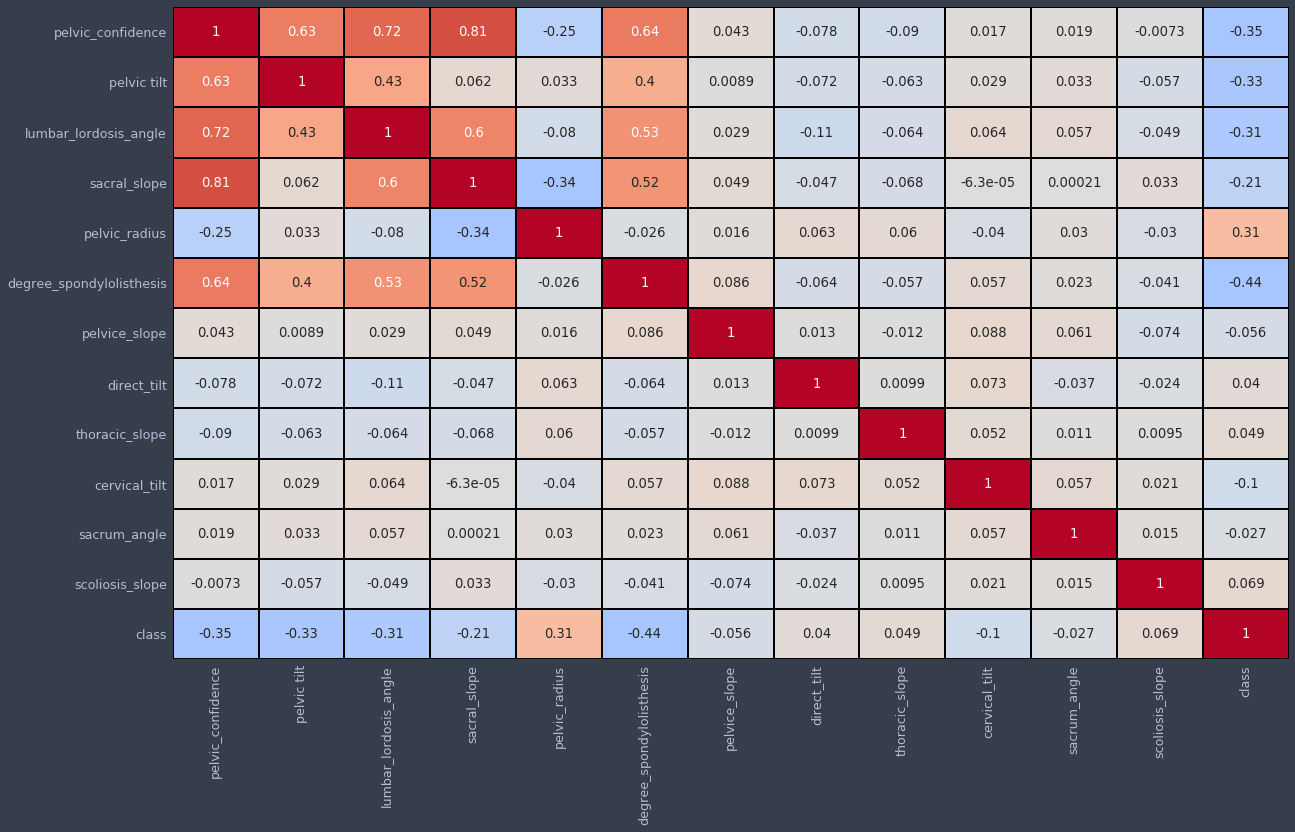

In [30]:
fig,ax = plt.subplots(figsize=(20,12))
plt.yticks(rotation=0)
sns.heatmap(spine_data_corr,cmap='coolwarm',annot=True,cbar=False,linecolor='black',linewidths=1,robust=True,center=0)

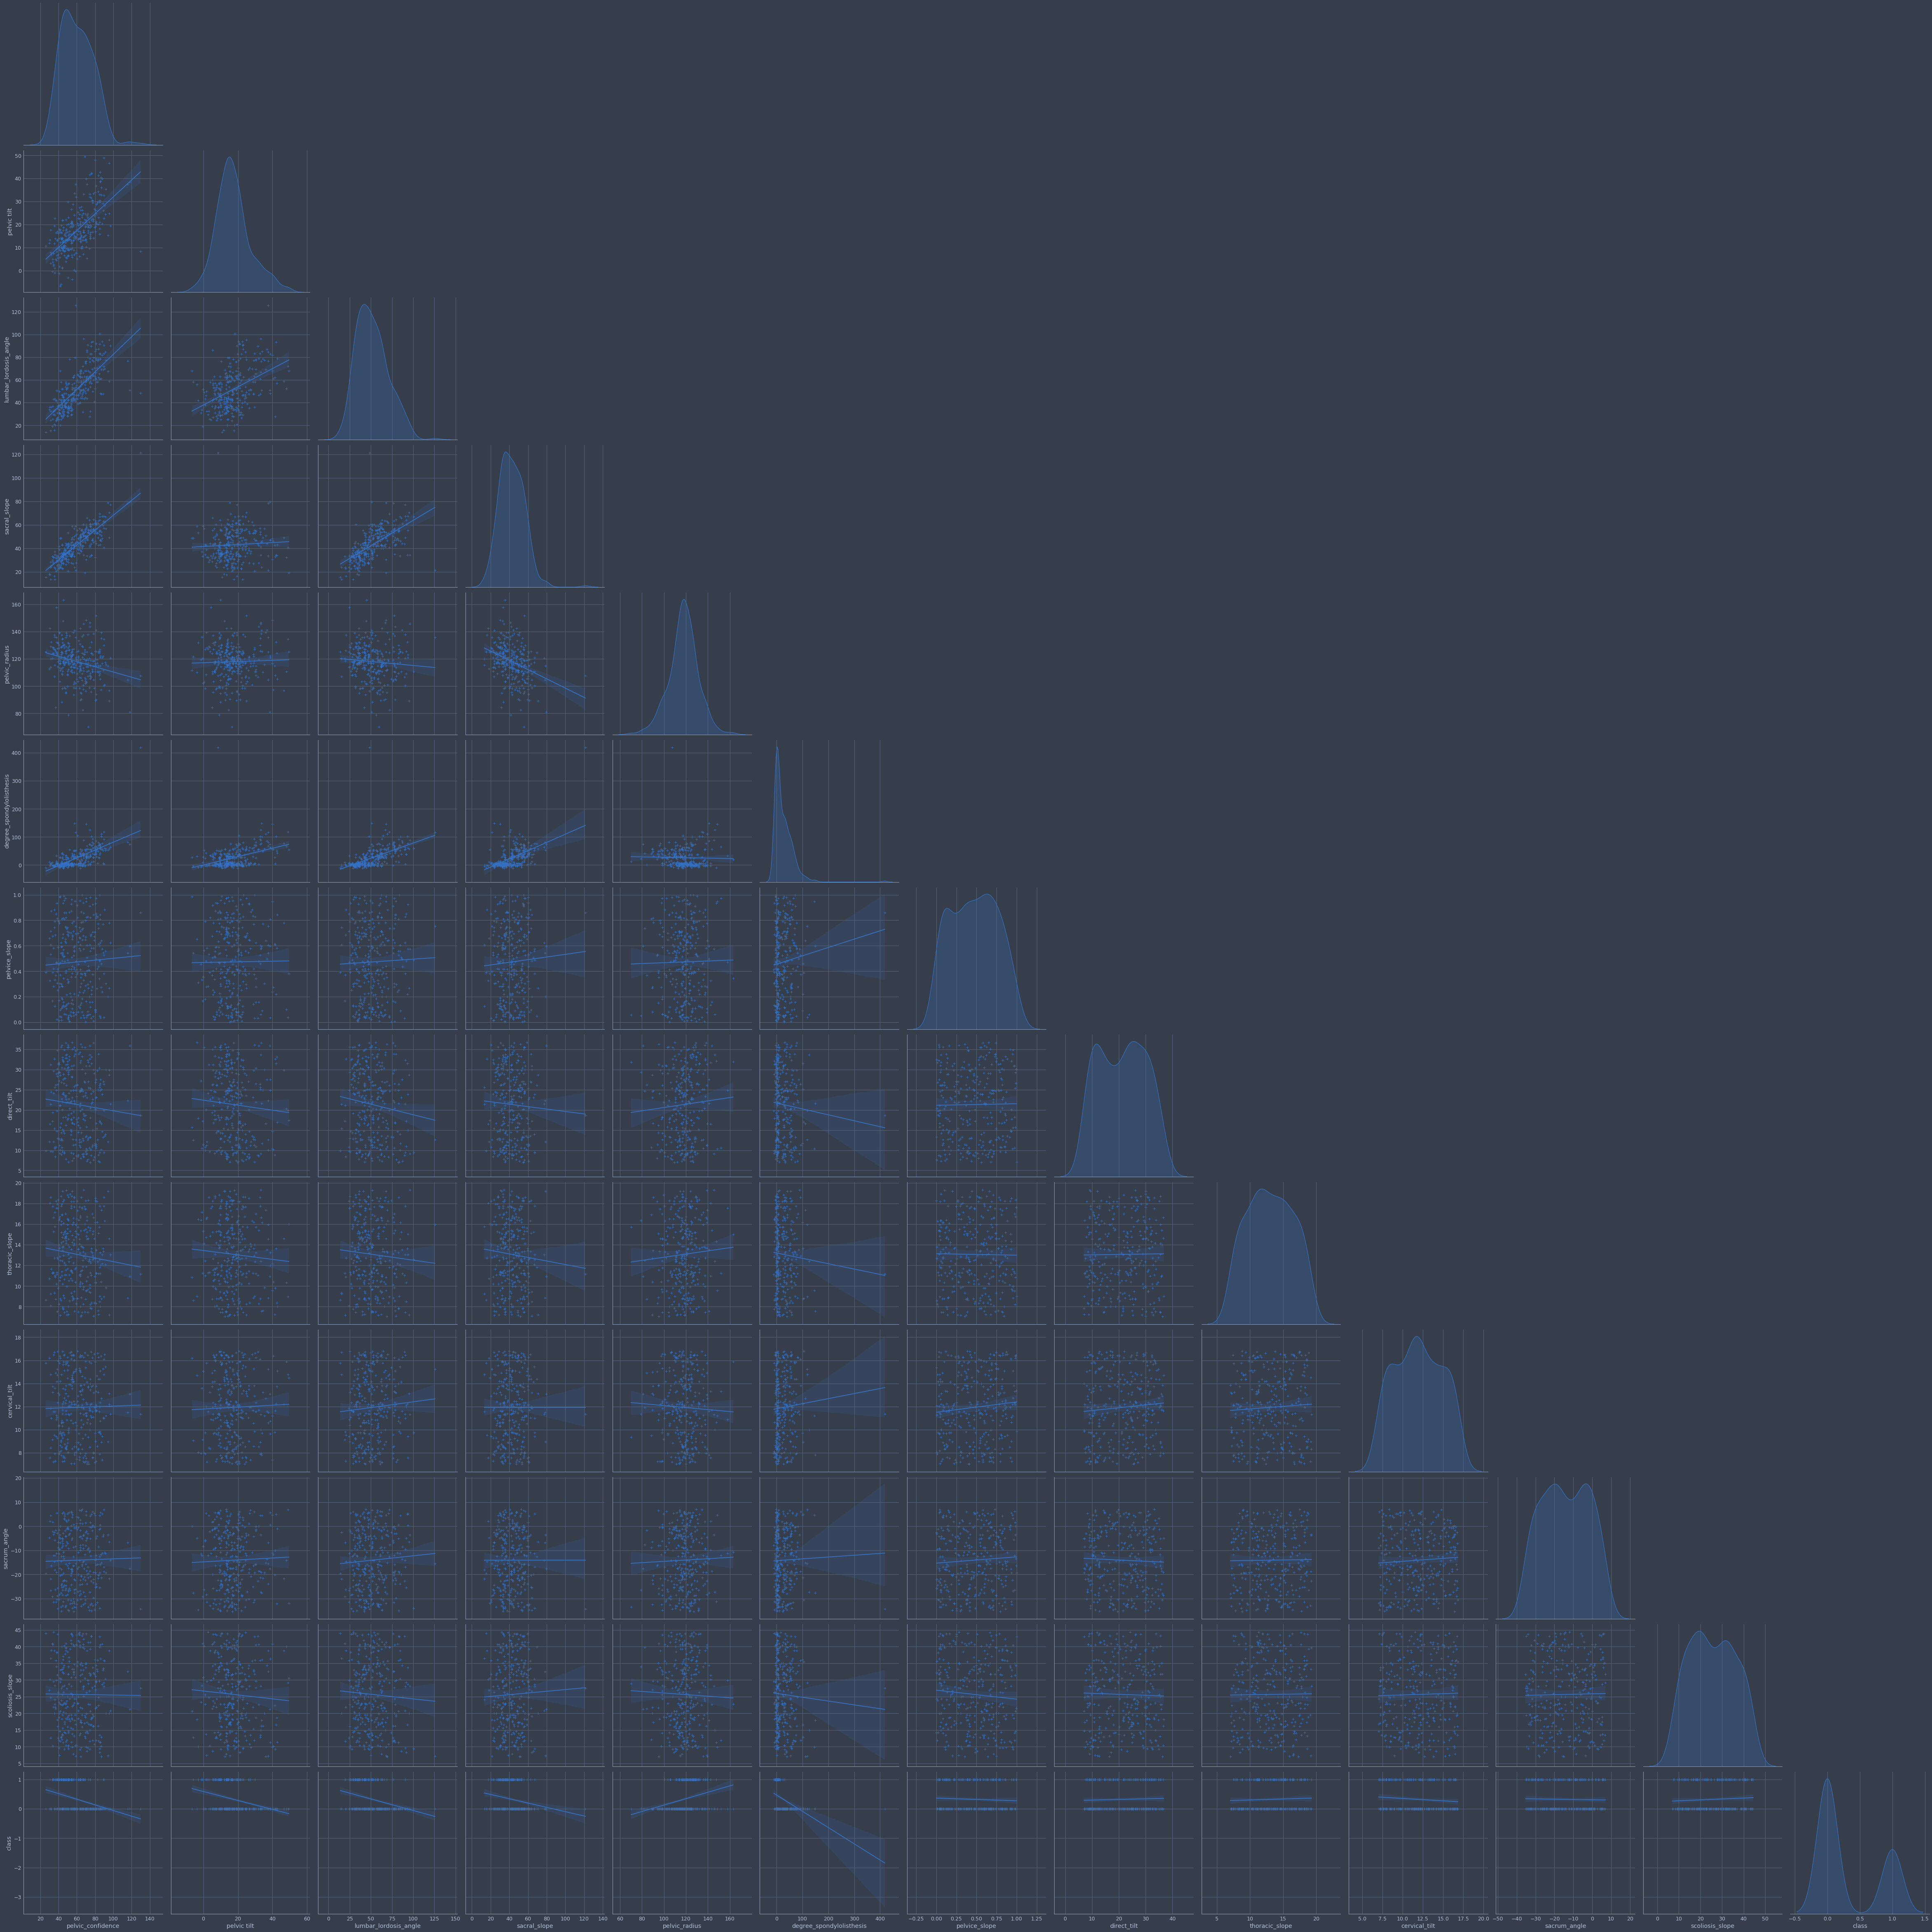

In [34]:
sns.pairplot(spine_data, corner=True, diag_kind='kde',kind='reg',markers='+',height=5,)

In [35]:
## since stone, pounds, and ounces are weight measurements, we exclude them from the training set
## since change is what we're trying to predict, we exclude them from the dataset
from sklearn.model_selection import train_test_split
X = spine_data.drop('class',axis=1)
Y = spine_data['class']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [36]:
x_train.shape, y_train.shape

((248, 12), (248,))

In [37]:
x_test.shape, y_test.shape

((62, 12), (62,))

In [67]:
## remember activation allows neural network to learn non linear relationships
## hidden layer size is like the neural network dimensions, this neural_network has 10 layers of neurons, 1 neuron
## this solver is an optimizer which works well on small datasets
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100),
                      max_iter=1000,
                      activation='logistic',
                      alpha=.001,
                      solver='lbfgs',
                      verbose=True
)
mlp_clf.fit(x_train, y_train)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [68]:
y_pred = mlp_clf.predict(x_test)

In [69]:
pred_results = pd.DataFrame({'y_test':y_test,
                            'y_pred':y_pred})
pred_results.sample(10)

,y_test,y_pred
2,1,1
266,0,1
124,0,1
123,0,0
145,0,0
104,0,0
84,1,1
258,1,0
230,0,0
286,0,0


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8064516129032258

In [71]:
spine_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
spine_data_crosstab

y_pred,0,1
y_test,,
0,35,8
1,4,15


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[35  8]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        43
           1       0.65      0.79      0.71        19

    accuracy                           0.81        62
   macro avg       0.77      0.80      0.78        62
weighted avg       0.82      0.81      0.81        62



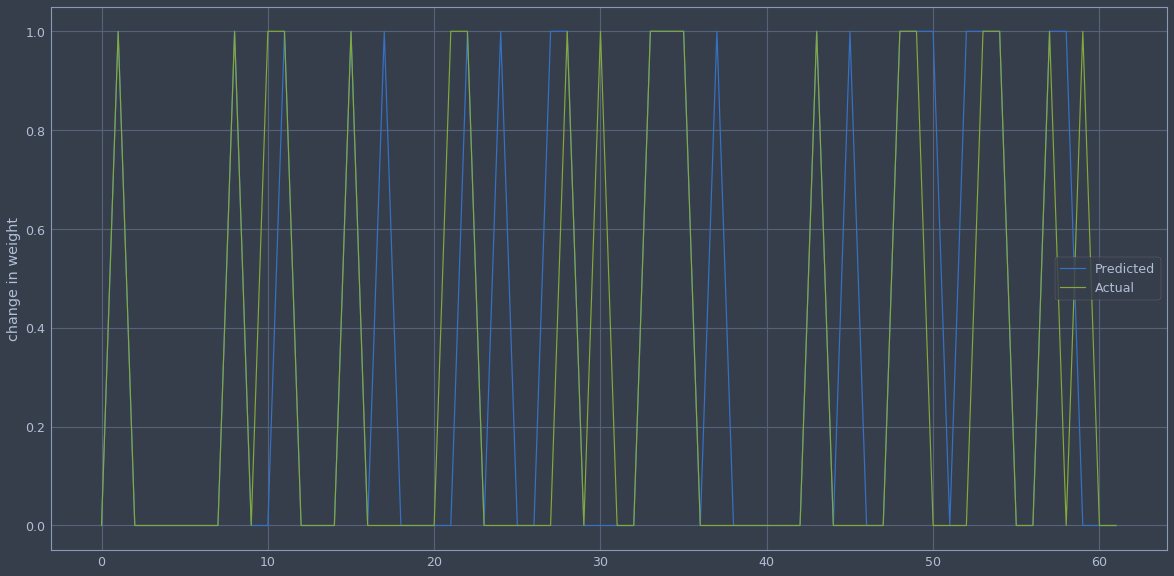

In [74]:
plt.figure(figsize=(20,10))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('change in weight')
plt.legend()
plt.show()